In [2]:
import pandas as pd
import numpy as np
! pip install seaborn
import seaborn as sns
! pip install xlrd # to handle Excel files


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


'''! pip install pydrive
# these classes allow you to request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1NhvgU9Tvfc0PxpylcggiyZAgm8jr1Uag' # sample 1PRZgZrqFchoLdXkWB-03KdesY9Gjp3Xg
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM

downloaded.GetContentFile('SARS_COV2_Enrichr_DSigDB_intersect_all_pkas_clogPs.csv')
'''
df = pd.read_csv("/Users/timpeterson/OneDrive-v3/Data/CADs/v2/SARS_COV2_Enrichr_DSigDB_intersect_all_pkas_clogPs.csv", sep='\t')

     |████████████████████████████████| 283 kB 1.6 MB/s 
     |████████████████████████████████| 103 kB 934 kB/s 


In [4]:
df.head(7)
df.shape

,name0,name_,pka_,logP_,pval_e,pval_x,odds_e,odds_x
0,suloctidil HL60 UP,suloctidil,9.76,5.61,6.706280e-35,2.286630e-39,11.84090,14.0411
1,suloctidil HL60 UP,suloctidil,9.76,5.54,6.706280e-35,2.286630e-39,11.84090,14.0411
2,prenylamine HL60 UP,prenylamine,10.48,5.89,2.411320e-21,8.893920e-23,20.13730,23.3918
3,prenylamine HL60 UP,prenylamine,10.48,6.12,2.411320e-21,8.893920e-23,20.13730,23.3918
4,acetohexamide PC3 UP,acetohexamide,-7.40,1.72,5.725160e-19,3.310350e-20,25.70890,29.8639
5,acetohexamide PC3 UP,acetohexamide,-7.40,1.81,5.725160e-19,3.310350e-20,25.70890,29.8639
6,terfenadine HL60 UP,terfenadine,9.02,5.89,6.137660e-10,3.402690e-20,9.85507,16.1616


(1688, 8)

In [41]:
df_avg_logP = df.groupby(['name_', 'pka_', 'pval_e', 'odds_e']).mean()

df0 = df_avg_logP.sort_values(by=['odds_e'], ascending=False).reset_index()

df_avg_logP_0 = df.groupby(['name_', 'pval_e'], as_index=False).mean()

df_avg_logP_00 = df_avg_logP_0.groupby('name_', as_index=False).filter(lambda x : len(x)>1)

df_avg_logP_000 = df_avg_logP_00.groupby(['name_'], as_index=False).mean()


#df_avg_logP.head()
#df_avg_logP.shape

df0.head()
df0.columns

,name_,pka_,pval_e,odds_e,logP_,pval_x,odds_x
0,acetohexamide,-7.40,5.725160e-19,25.70890,1.765,3.310350e-20,29.8639
1,prenylamine,10.48,2.411320e-21,20.13730,6.005,8.893920e-23,23.3918
2,suloctidil,9.76,6.706280e-35,11.84090,5.575,2.286630e-39,14.0411
3,terfenadine,9.02,6.137660e-10,9.85507,6.185,3.402690e-20,16.1616
4,prochlorperazine,8.39,3.731190e-09,9.59520,4.525,2.754210e-10,11.1459


Index(['name_', 'pka_', 'pval_e', 'odds_e', 'logP_', 'pval_x', 'odds_x'], dtype='object')

In [6]:
df1 = df0.loc[(df0['pka_'] > 8) & (df0['pka_'] < 12) & (df0['logP_'] > 3)]
df2 = df0.loc[(df0['pka_'] > 8) & (df0['pka_'] < 12) & (df0['logP_'] > 3) & (df0['pval_e'] < 0.05)]
df1.shape[0]
print("-")
df2.shape[0]
print("-")
df3 = df0.loc[(df0['pka_'] <= 8) | (df0['pka_'] >= 12) | (df0['logP_'] <= 3)]
df4 = df0.loc[((df0['pka_'] <= 8) | (df0['pka_'] >= 12) | (df0['logP_'] <= 3)) & (df0['pval_e'] < 0.05)]
df3.shape[0]
print("-")
df4.shape[0]

N = 2608
n = 363
#df_avg_logP.loc[(df_avg_logP['pka_'] > 8 & df_avg_logP['pka_'] < 12 & df_avg_logP['logP_mean'] > 3)].count()

153

-


8

-


689

-


3

In [32]:
import scipy.stats as stats   
stats.hypergeom.sf(8,2806,11,363, loc=0)
#pvalue = 1-stats.hypergeom.cdf(45, 7518, 92. 1329)
#stats.hypergeom.sf(x,M,n,N,loc=0)

4.017099380786414e-07

In [42]:
'''file_id = '1PRZgZrqFchoLdXkWB-03KdesY9Gjp3Xg' # sample 
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM

downloaded.GetContentFile('all_pathogens_Enrichr_DSigDB_intersect_all_pkas_clogPs.csv')
'''

df_all = pd.read_csv("/Users/timpeterson/OneDrive-v3/Data/CADs/v2/all_pathogens_Enrichr_DSigDB_intersect_all_pkas_clogPs.csv", sep='\t')

#df_all = pd.read_csv("/Users/timpeterson/OneDrive-v3/Data/CADs/v2/all_pathogens_Enrichr_DSigDB_intersect_all_pkas_clogPs_475genes.csv", sep='\t')

"file_id = '1PRZgZrqFchoLdXkWB-03KdesY9Gjp3Xg' # sample \ndownloaded = drive.CreateFile({'id': file_id})\n# allows you to temporarily load your file in the notebook VM\n\ndownloaded.GetContentFile('all_pathogens_Enrichr_DSigDB_intersect_all_pkas_clogPs.csv')\n"

In [45]:
df_avg_logP_all = df_all.groupby(['name_', 'pka_', 'pval_e', 'odds_e']).mean()

df_avg_logP_all0 = df_all.groupby(['name_', 'pval_e'], as_index=False).mean()

df_avg_logP_all00 = df_avg_logP_all0.groupby('name_', as_index=False).filter(lambda x : len(x)>1)


df_avg_logP_all0_sorted = df_avg_logP_all00.sort_values(by=['odds_e'], ascending=False).reset_index()

df_avg_logP_all00_first = df_avg_logP_all0_sorted.groupby('name_', as_index=False).first()


df_avg_logP_all000 = df_avg_logP_all00.groupby(['name_'], as_index=False).mean()


df0_all = df_avg_logP_all.sort_values(by=['odds_e'], ascending=False).reset_index()

df00_all = df_avg_logP_all0.sort_values(by=['odds_e'], ascending=False).reset_index()

df000_all = df_avg_logP_all00.sort_values(by=['odds_e'], ascending=False).reset_index()

df0000_all = df_avg_logP_all000.sort_values(by=['odds_e'], ascending=False).reset_index()


#df_avg_logP.head()
#df_avg_logP.shape

df0_all.head(10)
df0_all.columns
df0_all.shape


df00_all.head(10)
df00_all.columns
df00_all.shape


df000_all.head(10)
df000_all.columns
df000_all.shape


df0000_all.head(10)
df0000_all.columns
df0000_all.shape

,name_,pka_,pval_e,odds_e,logP_
0,acetohexamide,-7.40,2.697840e-32,57.5871,1.765
1,benfluorex,9.14,7.719630e-31,47.9562,4.590
2,ticlopidine,7.31,1.566320e-21,45.1535,4.225
3,bepridil,9.16,1.872580e-27,41.3907,5.410
4,cloperastine,8.82,6.690380e-18,40.9965,5.095
5,prenylamine,10.48,3.004630e-27,36.5981,6.005
6,BENZOYL,-7.20,3.860420e-08,36.1228,3.350
7,glutaraldehyde,-6.60,3.868010e-08,36.1228,0.330
8,suloctidil,9.76,1.115990e-35,35.6597,5.575
9,terfenadine,9.02,1.363230e-40,35.3201,6.185


Index(['name_', 'pka_', 'pval_e', 'odds_e', 'logP_'], dtype='object')

(1741, 5)

,index,name_,pval_e,pka_,logP_,odds_e
0,447,acetohexamide,2.697840e-32,-7.40,1.765,57.5871
1,541,benfluorex,7.719630e-31,9.14,4.590,47.9562
2,1637,ticlopidine,1.566320e-21,7.31,4.225,45.1535
3,557,bepridil,1.872580e-27,9.16,5.410,41.3907
4,723,cloperastine,6.690380e-18,8.82,5.095,40.9965
5,1431,prenylamine,3.004630e-27,10.48,6.005,36.5981
6,51,BENZOYL,3.860420e-08,-7.20,3.350,36.1228
7,1004,glutaraldehyde,3.868010e-08,-6.60,0.330,36.1228
8,1590,suloctidil,1.115990e-35,9.76,5.575,35.6597
9,1613,terfenadine,1.363230e-40,9.02,6.185,35.3201


Index(['index', 'name_', 'pval_e', 'pka_', 'logP_', 'odds_e'], dtype='object')

(1726, 6)

,index,name_,pval_e,pka_,logP_,odds_e
0,541,benfluorex,7.719630e-31,9.14,4.590,47.9562
1,1637,ticlopidine,1.566320e-21,7.31,4.225,45.1535
2,557,bepridil,1.872580e-27,9.16,5.410,41.3907
3,723,cloperastine,6.690380e-18,8.82,5.095,40.9965
4,1431,prenylamine,3.004630e-27,10.48,6.005,36.5981
5,1590,suloctidil,1.115990e-35,9.76,5.575,35.6597
6,1613,terfenadine,1.363230e-40,9.02,6.185,35.3201
7,1432,primaquine,3.456530e-24,10.20,2.200,34.9522
8,1454,propofol,2.645150e-33,-5.00,3.985,33.1126
9,571,bisacodyl,2.169520e-19,4.08,4.160,31.1648


Index(['index', 'name_', 'pval_e', 'pka_', 'logP_', 'odds_e'], dtype='object')

(1197, 6)

,index,name_,pval_e,pka_,logP_,odds_e
0,374,suloctidil,2.178930e-34,9.76,5.575,27.883833
1,92,bepridil,1.393360e-02,9.16,5.410,27.252180
2,87,benfluorex,5.511050e-02,9.14,4.590,26.525220
3,387,ticlopidine,3.161355e-02,7.31,4.225,26.255925
4,334,prenylamine,1.001545e-27,10.48,6.005,24.792900
5,401,vanoxerine,1.000550e-20,8.58,5.570,24.617650
6,350,quinisocaine,4.355526e-14,8.64,3.915,20.677950
7,208,fluticasone,1.802136e-12,-3.40,2.635,20.260300
8,140,cloperastine,1.849900e-01,8.82,5.095,20.020823
9,396,trimipramine,3.106545e-09,9.42,4.715,19.990200


Index(['index', 'name_', 'pval_e', 'pka_', 'logP_', 'odds_e'], dtype='object')

(411, 6)

In [33]:
df0_all.to_csv('/Users/timpeterson/OneDrive-v3/Data/CADs/v2/for_graphpad_all_pathogens_ge_CADs_nonCADs_for_volcano_plot.csv', index=False)

In [26]:
'''df1_all = df0_all.loc[(df0_all['pka_'] > 8) & (df0_all['pka_'] < 12) & (df0_all['logP_'] > 3)]
df2_all = df0_all.loc[(df0_all['pka_'] > 8) & (df0_all['pka_'] < 12) & (df0_all['logP_'] > 3) & (df0_all['odds_e'] > 29) & (df0_all['pval_e'] < 1e-10)] # & (df0_all['odds_e'] > 30)
#df1.shape[0]
print("-")
df2_all.shape[0]
print("-")
df3_all = df0_all.loc[(df0_all['pka_'] <= 8) | (df0_all['pka_'] >= 12) | (df0_all['logP_'] <= 3)]
df4_all = df0_all.loc[((df0_all['pka_'] <= 8) | (df0_all['pka_'] >= 12) | (df0_all['logP_'] <= 3)) & (df0_all['odds_e'] > 29) & (df0_all['pval_e'] < 1e-10)  ] # & (df0_all['odds_e'] > 30)
#df3.shape[0]
#print("-")
df4_all.shape[0]
'''

df1_all = df0_all.loc[(df0_all['pka_'] > 8) & (df0_all['pka_'] < 12) & (df0_all['logP_'] > 3)]
df2_all = df0_all.loc[(df0_all['pka_'] > 8) & (df0_all['pka_'] < 12) & (df0_all['logP_'] > 2) & (df0_all['odds_e'] > 20) & (df0_all['pval_e'] < 1e-10)] # & (df0_all['odds_e'] > 30)
#df1.shape[0]
print("-")
df2_all.shape[0]
print("-")
df3_all = df0_all.loc[(df0_all['pka_'] <= 8) | (df0_all['pka_'] >= 12) | (df0_all['logP_'] <= 3)]
df4_all = df0_all.loc[((df0_all['pka_'] <= 8) | (df0_all['pka_'] >= 12) | (df0_all['logP_'] <= 2)) & (df0_all['odds_e'] > 20) & (df0_all['pval_e'] < 1e-10)  ] # & (df0_all['odds_e'] > 30)
#df3.shape[0]
#print("-")
df4_all.shape[0]


N = 2608
n = 363
#df_avg_logP.loc[(df_avg_logP['pka_'] > 8 & df_avg_logP['pka_'] < 12 & df_avg_logP['logP_mean'] > 3)].count()

'df1_all = df0_all.loc[(df0_all[\'pka_\'] > 8) & (df0_all[\'pka_\'] < 12) & (df0_all[\'logP_\'] > 3)]\ndf2_all = df0_all.loc[(df0_all[\'pka_\'] > 8) & (df0_all[\'pka_\'] < 12) & (df0_all[\'logP_\'] > 3) & (df0_all[\'odds_e\'] > 29) & (df0_all[\'pval_e\'] < 1e-10)] # & (df0_all[\'odds_e\'] > 30)\n#df1.shape[0]\nprint("-")\ndf2_all.shape[0]\nprint("-")\ndf3_all = df0_all.loc[(df0_all[\'pka_\'] <= 8) | (df0_all[\'pka_\'] >= 12) | (df0_all[\'logP_\'] <= 3)]\ndf4_all = df0_all.loc[((df0_all[\'pka_\'] <= 8) | (df0_all[\'pka_\'] >= 12) | (df0_all[\'logP_\'] <= 3)) & (df0_all[\'odds_e\'] > 29) & (df0_all[\'pval_e\'] < 1e-10)  ] # & (df0_all[\'odds_e\'] > 30)\n#df3.shape[0]\n#print("-")\ndf4_all.shape[0]\n'

-


9

-


3

In [28]:
import scipy.stats as stats   
stats.hypergeom.sf(11,2608,17,363, loc=0) # 1.4347315141149705e-07
#pvalue = 1-stats.hypergeom.cdf(45, 7518, 92. 1329)
#stats.hypergeom.sf(x,M,n,N,loc=0)
stats.hypergeom.sf(9,2608,12,363, loc=0) # 1.4347315141149705e-07


1.4347315141149705e-07

1.2423843845265296e-07

In [29]:
data = {'CADs' : df1['odds_e'], 'nonCADs' : df3['odds_e']}

df_merged = pd.concat(data, 
               axis = 1)


data_all = {'CADs' : df1_all['odds_e'], 'nonCADs' : df3_all['odds_e']}

df_all_merged = pd.concat(data_all, 
               axis = 1)

In [71]:
'''from google.colab import drive
drive.mount('/drive')'''


Mounted at /drive


In [31]:
#df_merged.to_csv('/drive/My Drive/WashU/Data/SSRIs/FOR_PAPER/SARS-CoV-2-CADs-analysis/for_graphpad_SARS_COV2_ge_CADs_nonCADs_odds_ratio.csv', index=False)
#df_merged.to_csv('/Users/timpeterson/OneDrive-v3/Data/CADs/v2/for_graphpad_SARS_COV2_ge_CADs_nonCADs_odds_ratio.csv', index=False)



#df_all_merged.to_csv('/drive/My Drive/WashU/Data/SSRIs/FOR_PAPER/SARS-CoV-2-CADs-analysis/for_graphpad_all_pathogens_ge_CADs_nonCADs_odds_ratio_475genes.csv', index=False)
df_all_merged.to_csv('/Users/timpeterson/OneDrive-v3/Data/CADs/v2/for_graphpad_all_pathogens_ge_CADs_nonCADs_odds_ratio_475genes.csv', index=False)

In [115]:
#df_all.head()

# define bin ranges
bins_A = np.arange(-14, 15)
bins_B = np.arange(-14, 15)


df0_all['TA_pka_'] = pd.cut(df0_all['pka_'],bins=bins_A)
df0_all['TB_logP_'] = pd.cut(df0_all['logP_'],bins=bins_B)
df_out = df0_all.groupby(['TA_pka_','TB_logP_'])['odds_e'].describe()

df_out0 = df_out.sort_values('mean', ascending=False)

df_out0.head()


,,count,mean,std,min,25%,50%,75%,max
TA_pka_,TB_logP_,,,,,,,,
"(11, 12]","(-3, -2]",1.0,24.8344,NaN,24.8344,24.8344,24.8344,24.83440,24.8344
"(10, 11]","(6, 7]",3.0,24.7929,10.415764,16.8988,18.8903,20.8818,28.73995,36.5981
"(-6, -5]","(9, 10]",1.0,22.0751,NaN,22.0751,22.0751,22.0751,22.07510,22.0751
"(3, 4]","(5, 6]",1.0,21.1921,NaN,21.1921,21.1921,21.1921,21.19210,21.1921
"(7, 8]","(-5, -4]",1.0,21.1921,NaN,21.1921,21.1921,21.1921,21.19210,21.1921


,,count,mean,std,min,25%,50%,75%,max
TA_pka_,TB_logP_,,,,,,,,
"(10, 11]","(6, 7]",3.0,24.792900,10.415764,16.89880,18.890300,20.88180,28.73995,36.5981
"(9, 10]","(5, 6]",22.0,15.576075,11.972601,1.20409,4.927467,15.10585,22.29725,41.3907
"(-4, -3]","(6, 7]",4.0,15.047135,9.366973,2.06954,11.805785,17.13895,20.38030,23.8411
"(9, 10]","(6, 7]",7.0,13.807690,12.846202,3.15358,3.981395,6.30716,21.95510,35.3201
"(-1, 0]","(-2, -1]",5.0,13.516772,8.387476,2.20751,8.949350,14.71670,17.42770,24.2826


<BarContainer object of 170 artists>

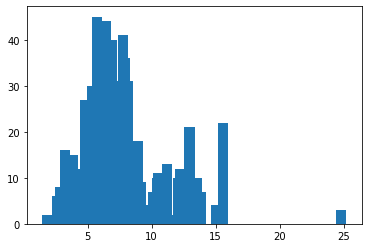

In [116]:
import matplotlib.pyplot as plt

df_out0_gt1 = df_out0[df_out0['count'] > 1]

df_out0_gt1.head()

plt.bar(df_out0_gt1['mean'], df_out0_gt1['count'])


In [107]:
df_out0_gt1.shape

(210, 8)

In [117]:
df_out0.to_csv('/drive/My Drive/WashU/Data/SSRIs/FOR_PAPER/SARS-CoV-2-CADs-analysis/for_graphpad_all_pathogens_ge_CADs_nonCADs_odds_ratio_binned_by_pka_clogP_sorted.csv')

In [113]:
tagsA = np.searchsorted(bins_A,df_all.pka_)
tagsB = np.searchsorted(bins_B,df_all.logP_)

vm = (tagsB>0) & (tagsB<len(bins_B)) & (tagsA>0) & (tagsA<len(bins_A))

dfm = df_all.iloc[vm]

dfm['TA_pka'] = bins_A[(tagsA-1)[vm]]
dfm['TB_logP'] = bins_B[(tagsB-1)[vm]]

df_out_v1 = dfm.groupby(['TA_pka','TB_logP'])['odds_e'].describe()

df_out_v10 = df_out_v1.sort_values('mean', ascending=False)

df_out_v10.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,,count,mean,std,min,25%,50%,75%,max
TA_pka,TB_logP,,,,,,,,
-7,-1,1.0,36.1228,NaN,36.1228,36.1228,36.1228,36.1228,36.1228
-6,10,1.0,22.0751,NaN,22.0751,22.0751,22.0751,22.0751,22.0751
7,-4,1.0,22.0751,NaN,22.0751,22.0751,22.0751,22.0751,22.0751
-6,8,1.0,22.0751,NaN,22.0751,22.0751,22.0751,22.0751,22.0751
3,5,1.0,21.1921,NaN,21.1921,21.1921,21.1921,21.1921,21.1921
